How does ASD affect facial emotion recognition?
using Autism in Child dataset
 (Facial Recognition - OpenCV, DeepFace)

In [ ]:
#!pip install kaggle

In [ ]:
#!pip install deepface opencv-python kagglehub matplotlib

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import os
import cv2
import kagglehub
from deepface import DeepFace
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
path = kagglehub.dataset_download("imrankhan77/autistic-children-facial-data-set")
print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/imrankhan77/autistic-children-facial-data-set/versions/1


In [ ]:
import os

dataset_path = "/root/.cache/kagglehub/datasets/imrankhan77/autistic-children-facial-data-set/versions/1"
autistic_path = os.path.join(dataset_path, "train", "autistic")
non_autistic_path = os.path.join(dataset_path, "train", "non_autistic")

# Print available images
print("Autistic images:", os.listdir(autistic_path)[:5])  # Show first 5 images
print("Non-Autistic images:", os.listdir(non_autistic_path)[:5])


Autistic images: ['0649.jpg', '1175.jpg', '0697.jpg', '0357.jpg', '0790.jpg']
Non-Autistic images: ['0649.jpg', '1175.jpg', '0697.jpg', '0357.jpg', '0790.jpg']


In [ ]:
asd_image_path = os.path.join(dataset_path, "train", "autistic", "0649.jpg")
non_asd_image_path = os.path.join(dataset_path, "train", "non_autistic", "0649.jpg")

In [ ]:
print("ASD Image Path:", asd_image_path)
print("Non-ASD Image Path:", non_asd_image_path)

ASD Image Path: /root/.cache/kagglehub/datasets/imrankhan77/autistic-children-facial-data-set/versions/1/train/autistic/0649.jpg
Non-ASD Image Path: /root/.cache/kagglehub/datasets/imrankhan77/autistic-children-facial-data-set/versions/1/train/non_autistic/0649.jpg


In [ ]:
import os

print("Files in autistic folder:", os.listdir(os.path.join(dataset_path, "train", "autistic")))
print("Files in non_autistic folder:", os.listdir(os.path.join(dataset_path, "train", "non_autistic")))


Files in autistic folder: ['0649.jpg', '1175.jpg', '0697.jpg', '0357.jpg', '0790.jpg', '1038.jpg', '0900.jpg', '0216.jpg', '0905.jpg', '0736.jpg', '0064.jpg', '0976.jpg', '0594.jpg', '0703.jpg', '0792.jpg', '1007.jpg', '0116.jpg', '0126.jpg', '0133.jpg', '0048.jpg', '1105.jpg', '0496.jpg', '0423.jpg', '1152.jpg', '0801.jpg', '0282.jpg', '0662.jpg', '1258.jpg', '0853.jpg', '0342.jpg', '0045.jpg', '0143.jpg', '0611.jpg', '0915.jpg', '0511.jpg', '0991.jpg', '1157.jpg', '0545.jpg', '0766.jpg', '1018.jpg', '0374.jpg', '0444.jpg', '0012.jpg', '0673.jpg', '0360.jpg', '0166.jpg', '1182.jpg', '0615.jpg', '0424.jpg', '0921.jpg', '0605.jpg', '1137.jpg', '1001.jpg', '0645.jpg', '0013.jpg', '0907.jpg', '1173.jpg', '0694.jpg', '1109.jpg', '0421.jpg', '1209.jpg', '0265.jpg', '0317.jpg', '0650.jpg', '1028.jpg', '0926.jpg', '0454.jpg', '1047.jpg', '0430.jpg', '1016.jpg', '0410.jpg', '0138.jpg', '1237.jpg', '1055.jpg', '0328.jpg', '1156.jpg', '0134.jpg', '0923.jpg', '0710.jpg', '0005.jpg', '1080.jpg', '

In [ ]:
def analyze_emotions(image_path):
    try:
        # Load image using OpenCV
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Perform emotion analysis
        analysis = DeepFace.analyze(img, actions=["emotion"], enforce_detection=False)

        # Extract emotion scores
        emotions = analysis[0]['emotion']

        # Display image and detected emotion
        plt.figure(figsize=(8, 4))
        plt.subplot(1, 2, 1)
        plt.imshow(img)
        plt.axis("off")
        plt.title(f"Detected Emotion: {analysis[0]['dominant_emotion']}")

        # Plot emotion distribution
        plt.subplot(1, 2, 2)
        sns.barplot(x=list(emotions.keys()), y=list(emotions.values()))
        plt.xticks(rotation=45)
        plt.xlabel("Emotion")
        plt.ylabel("Confidence")
        plt.title("Emotion Distribution")

        plt.tight_layout()
        plt.show()

        return analysis[0]['dominant_emotion']
    except Exception as e:
        print("Error processing image:", e)
        return None

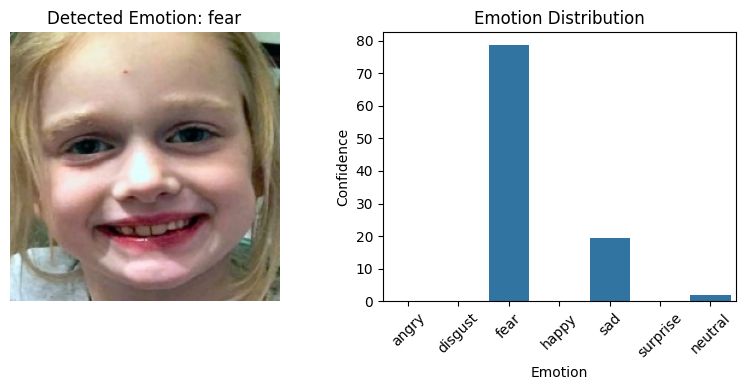

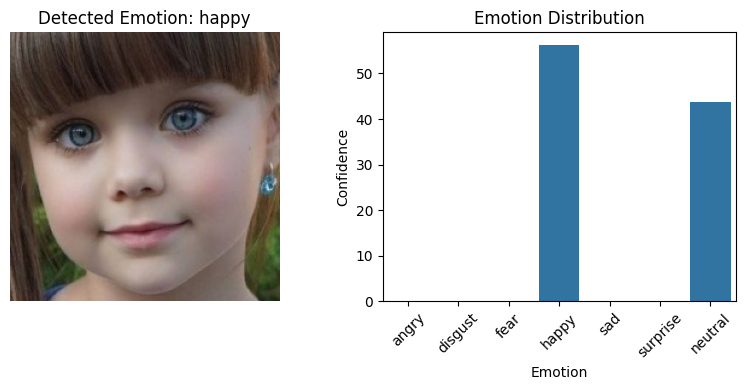

Emotion detected in ASD child: fear
Emotion detected in Non-ASD child: happy


In [ ]:
# Analyze emotions for both groups
asd_emotion = analyze_emotions(asd_image_path)
non_asd_emotion = analyze_emotions(non_asd_image_path)

print("Emotion detected in ASD child:", asd_emotion)
print("Emotion detected in Non-ASD child:", non_asd_emotion)
